In [1]:
# Importing the main libs for the work:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier

import joblib

In [2]:
df = pd.read_csv("synthetic_furniture_barriers_dataset/synthetic_furniture_barriers.csv")
df.head()

,user_id,product_name,x1_views,x2_chars_pdf,x3_ship_page,x4_calc_used,x4_ship_cost,x5_assembly_page,x6_warranty,x7_return_page,x8_email_clicks,x9_chat_text,x10_reviews,Barrier_Class
0,1000,"Шкаф-купе ""Лофт""",5,7,0,0,0.00,0,0,0,2,высота глубина,1,2
1,1001,"Шкаф-купе ""Лофт""",1,1,0,0,0.00,1,0,0,1,установка инструкция сборка,0,3
2,1002,Стеллаж деревянный,3,1,0,0,0.00,1,0,0,2,инструмент нет инструкции,0,3
3,1003,Тумба прикроватная,11,6,0,0,0.00,0,0,0,2,не помещается высота ширина,2,2
4,1004,Тумба прикроватная,4,2,0,1,1717.38,0,0,0,5,дорого не по карману здравствуйте цена,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           5000 non-null   int64  
 1   product_name      5000 non-null   object 
 2   x1_views          5000 non-null   int64  
 3   x2_chars_pdf      5000 non-null   int64  
 4   x3_ship_page      5000 non-null   int64  
 5   x4_calc_used      5000 non-null   int64  
 6   x4_ship_cost      5000 non-null   float64
 7   x5_assembly_page  5000 non-null   int64  
 8   x6_warranty       5000 non-null   int64  
 9   x7_return_page    5000 non-null   int64  
 10  x8_email_clicks   5000 non-null   int64  
 11  x9_chat_text      5000 non-null   object 
 12  x10_reviews       5000 non-null   int64  
 13  Barrier_Class     5000 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 547.0+ KB


In [4]:
df.describe(include='all')

,user_id,product_name,x1_views,x2_chars_pdf,x3_ship_page,x4_calc_used,x4_ship_cost,x5_assembly_page,x6_warranty,x7_return_page,x8_email_clicks,x9_chat_text,x10_reviews,Barrier_Class
count,5000.000000,5000,5000.000000,5000.000000,5000.0,5000.00000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000,5000.000000,5000.000000
unique,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4412,NaN,NaN
top,NaN,Кровать двуспальная,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,качество нет доверия,NaN,NaN
freq,NaN,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,NaN
mean,3499.500000,NaN,3.553000,2.107600,0.0,0.20000,439.107800,0.20000,0.308000,0.240600,1.416600,NaN,1.975000,3.000000
std,1443.520003,NaN,2.575523,1.901354,0.0,0.40004,945.362986,0.40004,0.461713,0.427491,1.253219,NaN,2.335351,1.414355
min,1000.000000,NaN,1.000000,0.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,NaN,0.000000,1.000000
25%,2249.750000,NaN,2.000000,1.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,NaN,0.000000,2.000000
50%,3499.500000,NaN,3.000000,2.000000,0.0,0.00000,0.000000,0.00000,0.000000,0.000000,1.000000,NaN,1.000000,3.000000
75%,4749.250000,NaN,5.000000,3.000000,0.0,0.00000,0.000000,0.00000,1.000000,0.000000,2.000000,NaN,3.000000,4.000000


/tmp/ipykernel_39750/978151467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Barrier_Class', palette='viridis', legend=False)


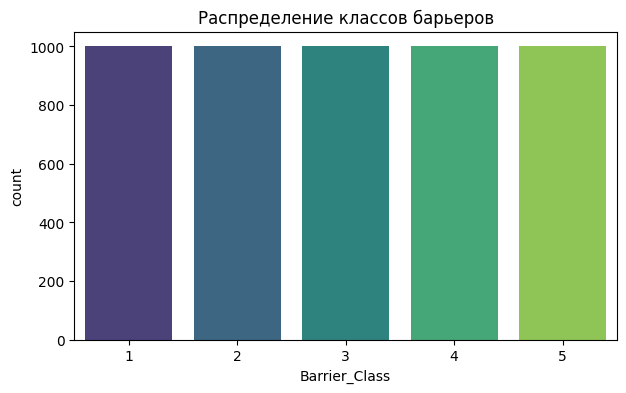

Barrier_Class
2    0.2
3    0.2
1    0.2
4    0.2
5    0.2
Name: proportion, dtype: float64

In [5]:
# Let's check the classes' balance:

plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Barrier_Class', palette='viridis', legend=False)
plt.title("Распределение классов барьеров")
plt.show()

df['Barrier_Class'].value_counts(normalize=True)

In [6]:
# Preparing the data to learn:

['x1_views', 'x2_chars_pdf', 'x3_ship_page', 'x4_calc_used',
 'x4_ship_cost', 'x5_assembly_page', 'x6_warranty',
 'x7_return_page', 'x8_email_clicks', 'x10_reviews']

X = df.drop(columns=['Barrier_Class', 'user_id', 'product_name'])
y = df['Barrier_Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [7]:
# XGBoost Learning Pipeline:

# TF-IDF transforming:
text_features = ['x9_chat_text']
numeric_features = [col for col in X.columns if col != 'x9_chat_text']

preprocessor = ColumnTransformer(
    transformers=[
        ('tfidf', TfidfVectorizer(
            max_features=5000,
            ngram_range=(1,2)
        ), 'x9_chat_text'),

        ('num', 'passthrough', numeric_features)
    ]
)

model = XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    n_estimators=250,
    learning_rate=0.07,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', model)
])

In [8]:
y_train = y_train - 1
y_test = y_test - 1

pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('tfidf', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [9]:
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200
           2       1.00      1.00      1.00       200
           3       1.00      0.99      0.99       200
           4       0.99      1.00      1.00       200

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



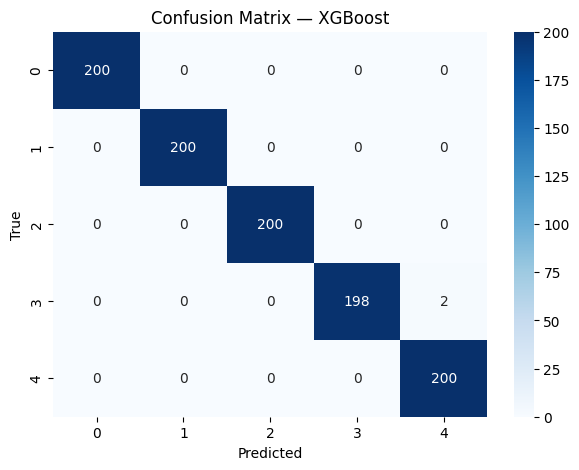

In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix — XGBoost")
plt.show()

In [11]:
joblib.dump(pipeline, "xgb_pipeline.pkl")
print('Saved to xgb_pipeline.pkl')

Saved to xgb_pipeline.pkl


In [12]:
'''
to load the model:

loaded_pipeline = joblib.load("xgb_pipeline.pkl")
'''

'\nto load the model:\n\nloaded_pipeline = joblib.load("xgb_pipeline.pkl")\n'

In [13]:
# ...